<a href="https://colab.research.google.com/github/seorinchoi/homework/blob/main/Autoincoder_%ED%95%A9%EC%84%B1%EA%B3%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


In [ ]:
batch_size = 256
learning_rate = 0.0002
num_epoch = 10

In [ ]:
mnist_train = dset.MNIST(root="../",train=True, transform=transforms.ToTensor(),target_transform=None,download=True)
mnist_test = dset.MNIST(root="../",train=False, transform=transforms.ToTensor(),target_transform=None,download=True)

train_loader=DataLoader(mnist_train,batch_size=batch_size,shuffle=True,num_workers=2,drop_last=True)
test_loader=DataLoader(mnist_test,batch_size=batch_size,shuffle=False,num_workers=2,drop_last=True)

In [ ]:
class Encoder(nn.Module):
  def __init__(self):
    super(Encoder,self).__init__()
    self.layer1 = nn.Sequential(
        nn.Conv2d(1,16,3,padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(16),
        nn.Conv2d(16,32,3,padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(32),
        nn.Conv2d(32,64,3,padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(64),
        nn.MaxPool2d(2,2)
    )
    self.layer2 = nn.Sequential(
        nn.Conv2d(64,128,3,padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(128),
        nn.MaxPool2d(2,2),
        nn.Conv2d(128,256,3,padding=1), #텐서 사이즈  7X7
        nn.ReLU()
    )
  def forward(self,x):
    out= self.layer1(x)
    out= self.layer2(out)
    out = out.view(batch_size,-1)
    return out

In [ ]:
class Decoder(nn.Module):
  def __init__(self):
    super(Decoder,self).__init__()
    self.layer1 = nn.Sequential(
        nn.ConvTranspose2d(256,128,3,2,1,1), #14X14
        nn.ReLU(),
        nn.BatchNorm2d(128),
        nn.ConvTranspose2d(128,64,3,1,1),
        nn.ReLU(),
        nn.BatchNorm2d(64)
    )
    self.layer2 = nn.Sequential(
        nn.ConvTranspose2d(64,16,3,1,1),
        nn.ReLU(),
        nn.BatchNorm2d(16),
        nn.ConvTranspose2d(16,1,3,2,1,1),
        nn.ReLU() #28X28
    )
  def forward(self,x):
    out = x.view(batch_size,256,7,7)
    out= self.layer1(out)
    out= self.layer2(out)
    return out



In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
encoder = Encoder().to(device)
decoder = Decoder().to(device)

parameters = list (encoder.parameters())+list(decoder.parameters())

loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(parameters, lr=learning_rate)


cuda:0


In [ ]:
loss_arr = []
for i in range(num_epoch):
  for j, [image,label] in enumerate(train_loader):

    noise = init.normal_(torch.FloatTensor(batch_size,1,28,28),0,0.1)
    image = image + noise
    image = image.to(device)

    optimizer.zero_grad()

    output = encoder(image)
    output = decoder(output)

    #오타 검수해서 수정
    loss = loss_func(output,image)
    loss.backward()
    optimizer.step()

  """if j%1000 == 0:
    print(loss)
    loss_arr.append(loss.cpu().data.numpy()[0])"""

torch.Size([256, 28, 28])


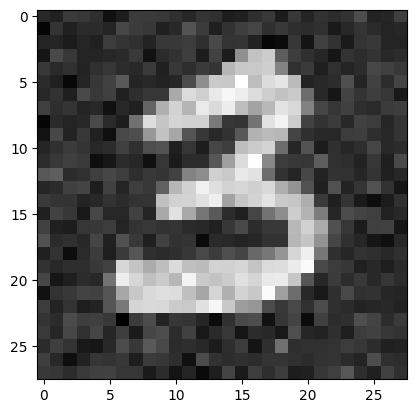

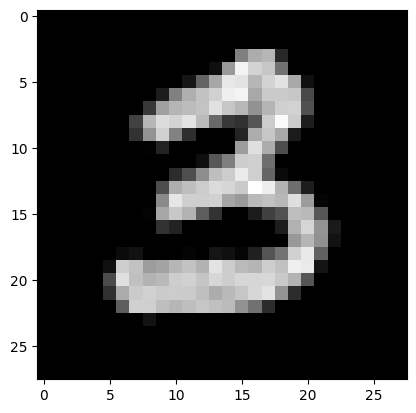

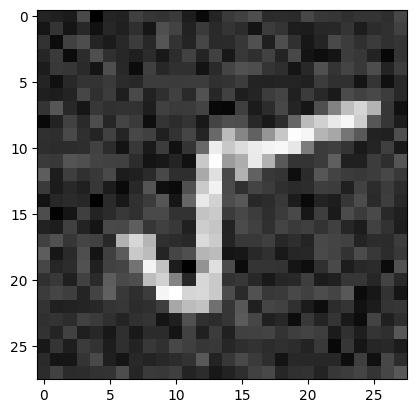

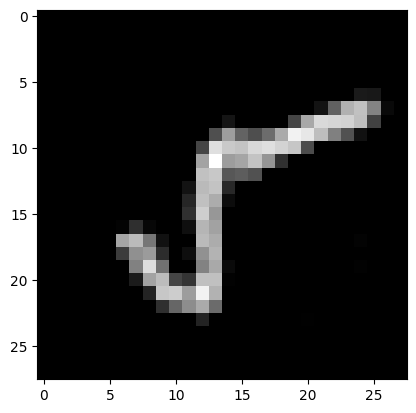

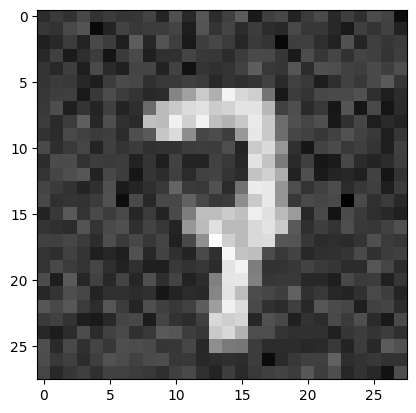

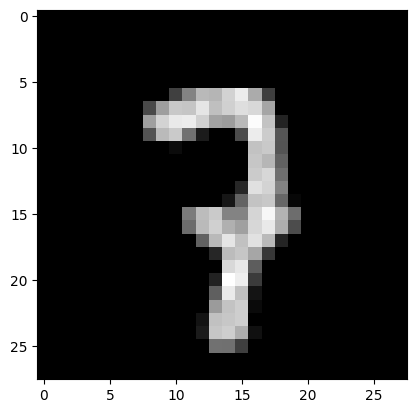

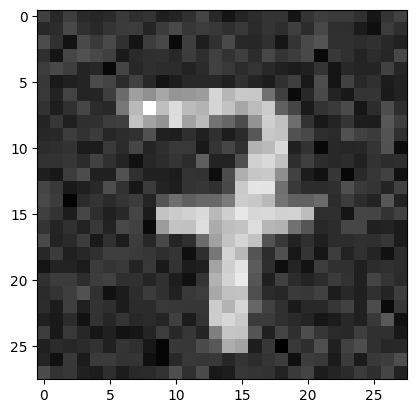

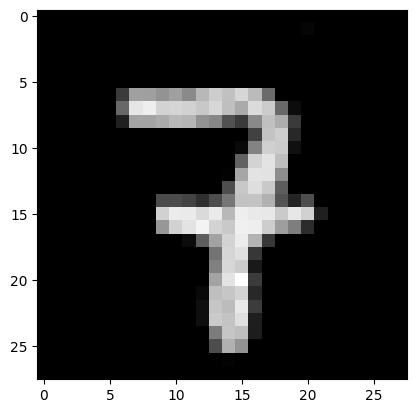

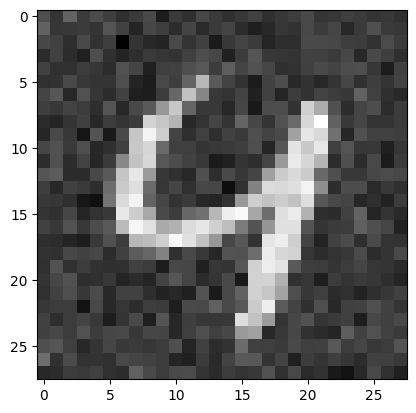

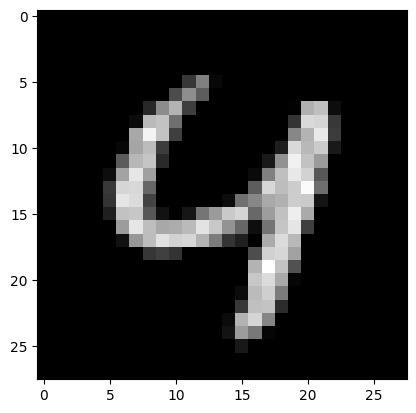

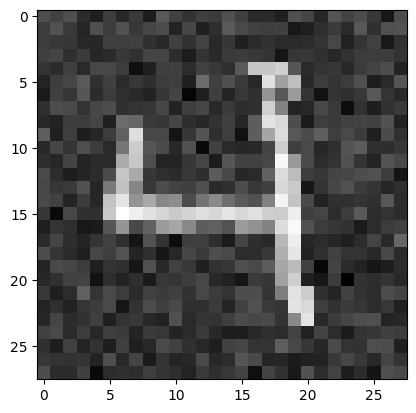

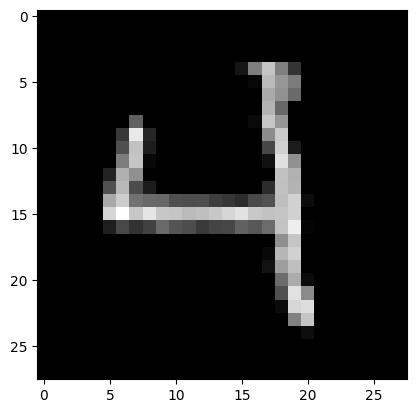

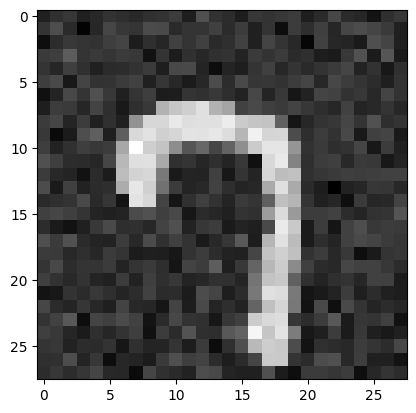

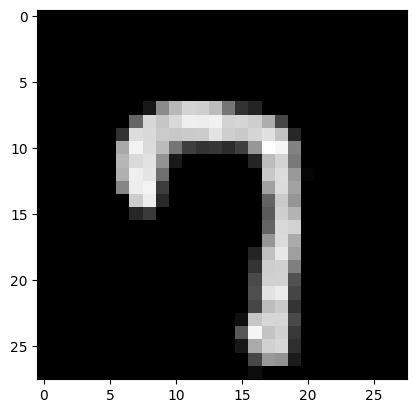

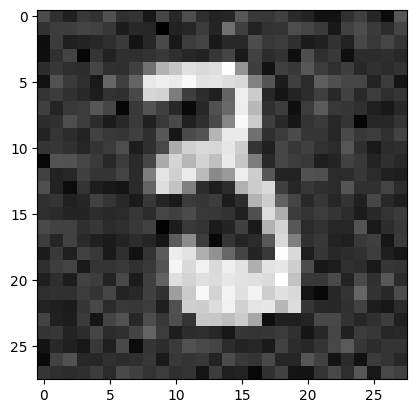

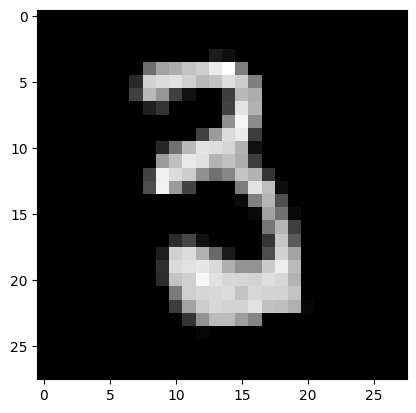

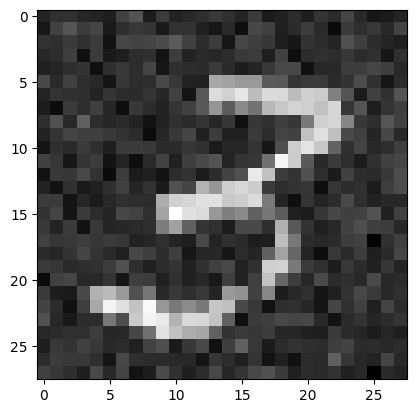

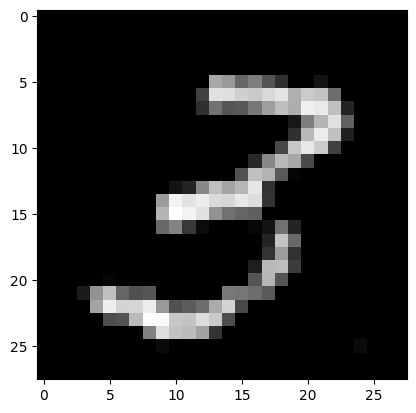

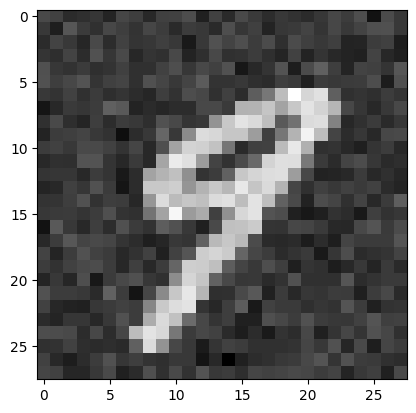

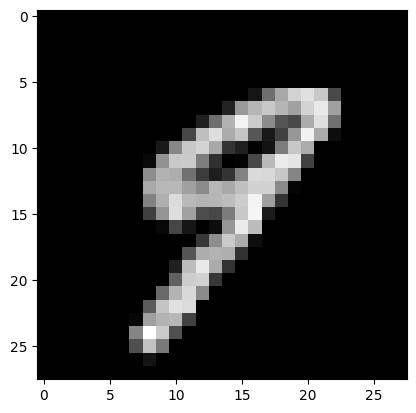

In [ ]:
out_img = torch.squeeze(output.cpu().data)
print(out_img.size())

for i in range (10):
  plt.imshow(torch.squeeze(image[i]).cpu().numpy(),cmap="gray")
  plt.show()
  plt.imshow(out_img[i].numpy(),cmap='gray')
  plt.show()

In [ ]:
with torch.no_grad():
  for i in range(1):
    for j, [image,label] in enumerate(test_loader):
      noise = init.normal_(torch.FloatTensor(batch_size,1,28,28),0,0.1)
      image = image + noise
      image = image.to(device)
      optimizer.zero_grad()
      image = image.to(device)

      output = encoder(image)
      output = decoder(output)


torch.Size([256, 28, 28])


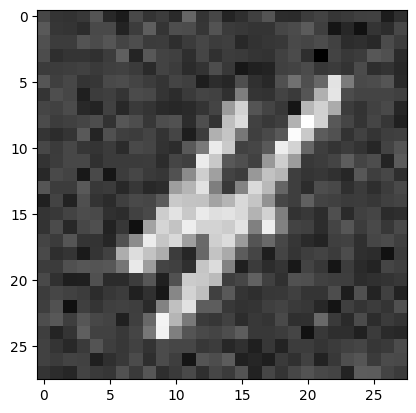

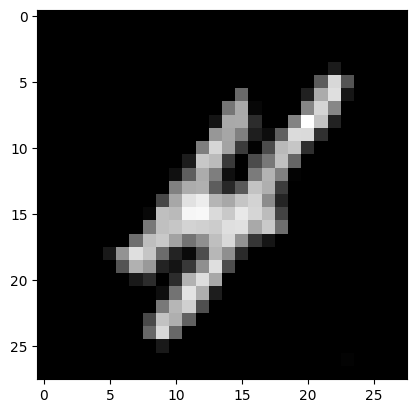

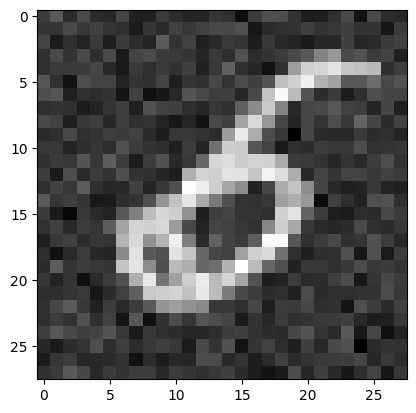

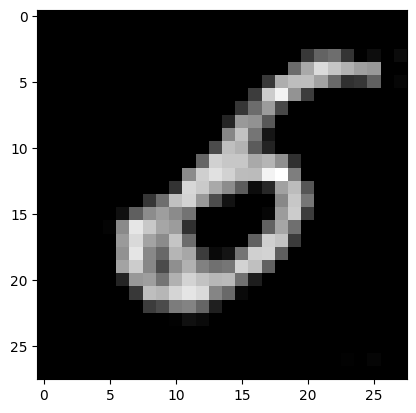

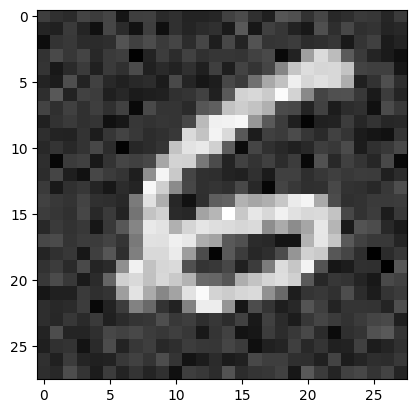

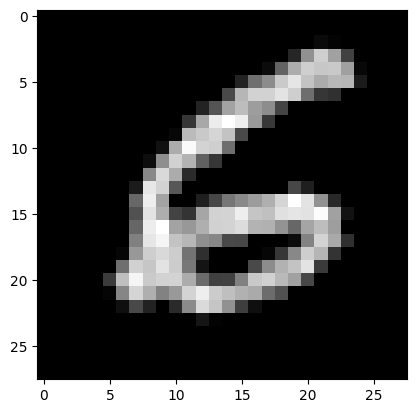

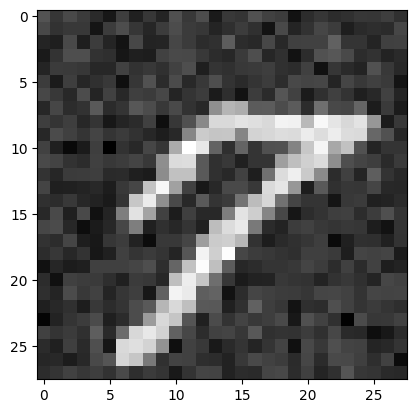

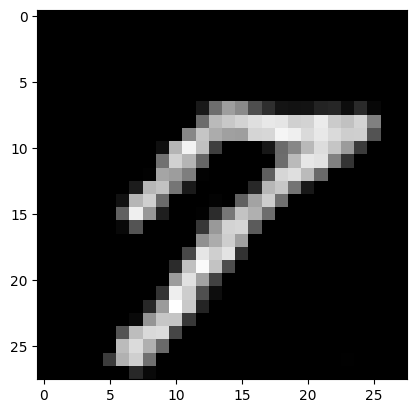

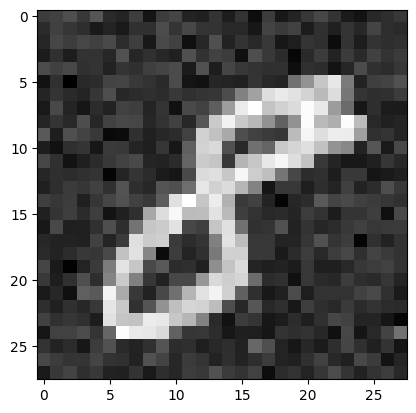

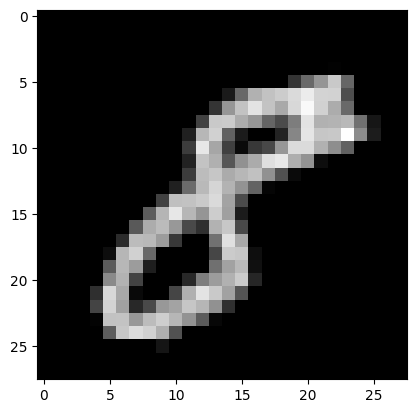

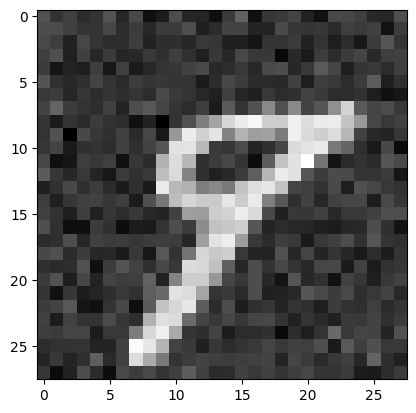

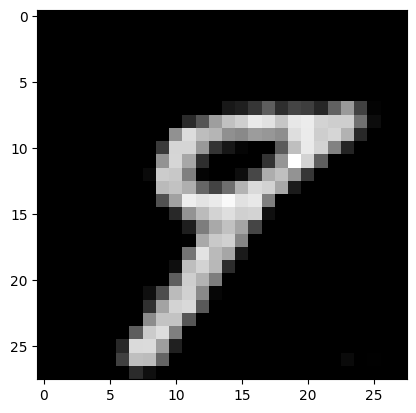

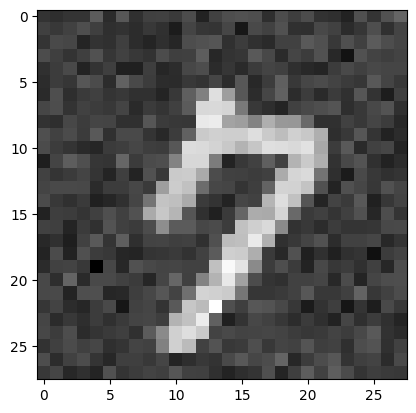

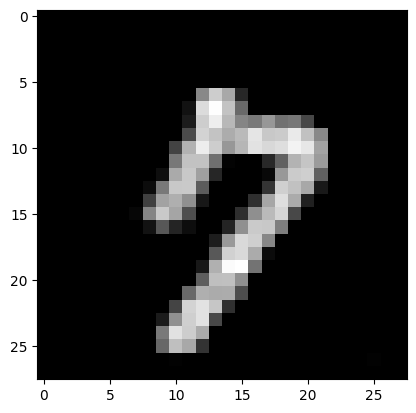

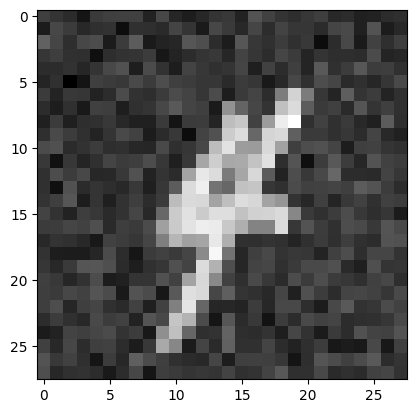

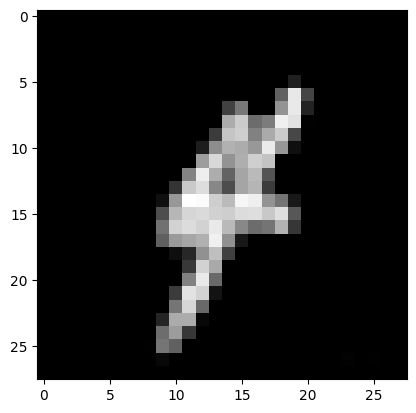

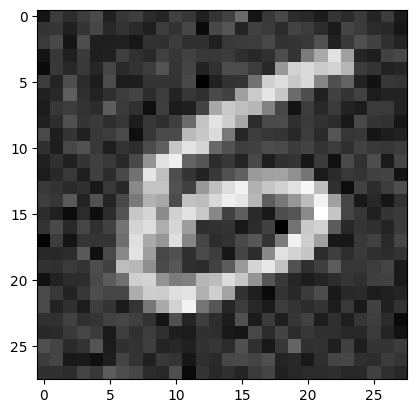

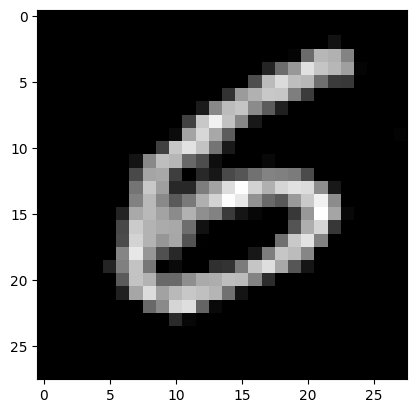

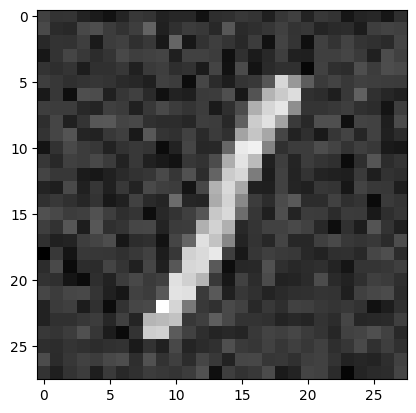

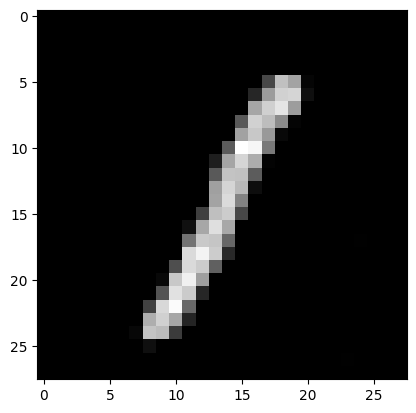

In [ ]:
out_img = torch.squeeze(output.cpu().data)
print(out_img.size())

for i in range (10):
  plt.imshow(torch.squeeze(image[i]).cpu().numpy(),cmap="gray")
  plt.show()
  plt.imshow(out_img[i].numpy(),cmap='gray')
  plt.show()